# Part I - Ford GoBike System Dataset
## by Tinh Bui Duong

## Introduction

The Ford GoBike System Dataset provides data on individual bike-sharing rides taken across the San Francisco Bay area. Each record represents a unique ride and includes 16 columns with details like trip duration, start and end stations, user demographics, and bike-sharing program participation. This data allows for analysis of various aspects of bike usage, from station popularity to demographic usage patterns.

## Preliminary Wrangling

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
data  = pd.read_csv( '201902-fordgobike-tripdata.csv')

In [4]:
# Display the first few rows to understand the dataset structure
display(data.head())

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
# Check dataset structure and column data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
# View basic statistics of numerical columns
print(data.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.00000

In [7]:
# Check for missing values
print(data.isnull().sum())

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64


### What is the structure of your dataset?

#### Shape: 16 columns.
#### Columns and Data Types:
- **`duration_sec`**: int64 - Duration of each trip in seconds.
- **`start_time`**: object - Starting timestamp of the trip (needs to be converted to datetime format).
- **`end_time`**: object - Ending timestamp of the trip (needs to be converted to datetime format).
- **`start_station_id`**: float64 - Unique identifier for the starting station (some values are missing).
- **`start_station_name`**: object - Name of the starting station (some values are missing).
- **`start_station_latitude`**: float64 - Latitude of the starting station.
- **`start_station_longitude`**: float64 - Longitude of the starting station.
- **`end_station_id`**: float64 - Unique identifier for the ending station (some values are missing).
- **`end_station_name`**: object - Name of the ending station (some values are missing).
- **`end_station_latitude`**: float64 - Latitude of the ending station.
- **`end_station_longitude`**: float64 - Longitude of the ending station.
- **`bike_id`**: int64 - Unique identifier for the bike used in the trip.
- **`user_type`**: object - Type of user (e.g., Subscriber or Customer).
- **`member_birth_year`**: float64 - Year of birth of the member (some values are missing).
- **`member_gender`**: object - Gender of the member (some values are missing).
- **`bike_share_for_all_trip`**: object - Whether the trip was a bike share for all trip.

### What is/are the main feature(s) of interest in your dataset?

The main features of interest in the **Ford GoBike System Dataset** depend on the analysis objectives. However, the following features are likely to be the focus of most exploratory and explanatory data analysis:

##### 1. **Trip Duration (`duration_sec`)**
   - This feature indicates how long each bike trip lasted, in seconds. It's a key metric for understanding patterns of usage and can be used to analyze:
     - Average trip duration for different user types.
     - Differences in trip duration by day of the week, time of day, or season.

##### 2. **User Information:**
   - **`user_type`** (Subscriber vs. Customer):
     - This can help identify how different types of users use the service (e.g., whether subscribers tend to take longer trips compared to customers).
   - **`member_birth_year`** (Age of user):
     - Analyzing trip duration or trip frequency by age can help identify trends related to demographic characteristics.
   - **`member_gender`** (Gender of user):
     - This feature can be useful to investigate if there are significant gender differences in usage patterns (e.g., are trips shorter or longer for males vs. females).

##### 3. **Station Information:**
   - **`start_station_id`** and **`end_station_id`** (Station IDs):
     - These features are essential for understanding the distribution of bike usage across different stations. By analyzing the most popular stations for starting or ending trips, we can identify high-traffic areas and patterns.
   - **`start_station_name`** and **`end_station_name`** (Station names):
     - Similar to station IDs, these provide more readable identifiers for the stations, which can be used to explore usage patterns across different geographic locations.

##### 4. **Geographic Information:**
   - **`start_station_latitude`**, **`start_station_longitude`**, **`end_station_latitude`**, **`end_station_longitude`**:
     - These features allow for spatial analysis. By mapping trip origins and destinations, we can identify geographic patterns of bike usage and demand in different areas of the city.

##### 5. **Time Information:**
   - **`start_time`** and **`end_time`** (Timestamps):
     - Converting these to datetime format allows for exploring temporal trends in bike usage, such as:
       - The busiest times of day for trips.
       - Usage patterns across different days of the week or seasons of the year.
       - Duration variations based on time of day or specific events.

##### 6. **Trip Type:**
   - **`bike_share_for_all_trip`**:
     - This feature indicates whether the trip was part of a program offering bike sharing for all, which could provide insights into the usage of special programs and their impact on trip patterns.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

In the Ford GoBike System Dataset, the features that will help support an investigation into the feature(s) of interest (such as trip duration, user demographics, and station information) include the following:

##### 1. `start_time` and `end_time`
   - **Why it helps:** 
     These timestamps are critical for exploring temporal patterns of bike usage. By converting these into datetime format, we can derive useful insights such as:
     - **Time of day**: The distribution of trips throughout the day, potentially linking trip duration or user type to specific hours.
     - **Day of the week**: Understanding if certain days experience more trips or longer durations, or if the behavior differs by weekdays vs. weekends.
     - **Seasonal trends**: Identifying if bike usage varies in different months or seasons (e.g., higher usage in summer).
   
##### 2. `start_station_id` and `end_station_id`
   - **Why it helps:** 
     These identifiers can be used to explore which stations are most popular for starting or ending trips. The popularity of stations might impact the trip duration, depending on factors like:
     - Proximity to key areas (e.g., tourist attractions, transit stations).
     - Availability of bikes at popular stations.
     - Different types of bike programs available at specific stations (e.g., bike share for all).

##### 3. `start_station_latitude`, `start_station_longitude`, `end_station_latitude`, and `end_station_longitude`
   - **Why it helps:** 
     These geographic coordinates provide spatial data that can be mapped to analyze:
     - The **distribution of trips** across different neighborhoods.
     - **Distance-based patterns**: Are trips from farther away stations longer or shorter? Are certain geographic areas more frequently used?
     - **Heatmaps**: To visualize the density of trips in various regions and understand patterns in demand.

##### 4. `user_type` (Subscriber vs. Customer)
   - **Why it helps:**
     This categorical feature will allow us to compare the usage patterns between:
     - **Subscribers**: Likely to have more regular, short-duration trips.
     - **Customers**: Likely to have less frequent, possibly longer trips.
     - Investigating the difference in trip durations and other trip-related characteristics by user type can yield insights about user behavior.

##### 5. `member_birth_year` and `member_gender`
   - **Why they help:** 
     These demographic features will help explore usage patterns across different age groups and genders:
     - **Age**: By calculating the age from the `member_birth_year`, we can examine how bike usage varies by age group, identifying whether certain age groups tend to take longer or more frequent trips.
     - **Gender**: Investigating gender differences can help reveal if males or females have different trip patterns, durations, or preferences.

##### 6. `bike_share_for_all_trip`
   - **Why it helps:**
     This feature indicates whether the trip was part of a bike-sharing program aimed at making bikes accessible to all users. It will help to:
     - Investigate how these trips differ in terms of **duration**, **distance**, or **frequency**.
     - See if these types of trips are more common at certain times or stations.
   

## Univariate Exploration

### Question: What is the distribution of trip durations (in seconds)? Are there any unusually short or long trips?

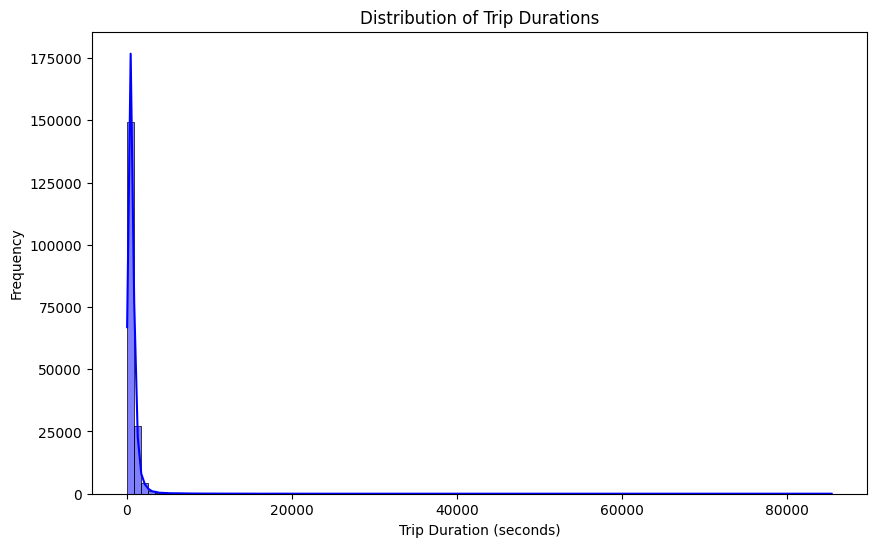

In [8]:
# Plotting the distribution of trip durations
plt.figure(figsize=(10,6))
sns.histplot(data['duration_sec'], bins=100, kde=True, color='blue')

# Adding labels and title
plt.title('Distribution of Trip Durations')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

##### Observations:
- The histogram will reveal whether the data is skewed or normally distributed.
- We will look for any potential outliers, such as very short or very long trips that might need further investigation or cleaning (e.g., trips lasting a few seconds or several days).
- The use of a Kernel Density Estimate (KDE) will help smooth the distribution and provide a better sense of its shape.

#### Question: What is the distribution of users by type (Subscriber vs. Customer)? How do the counts compare?

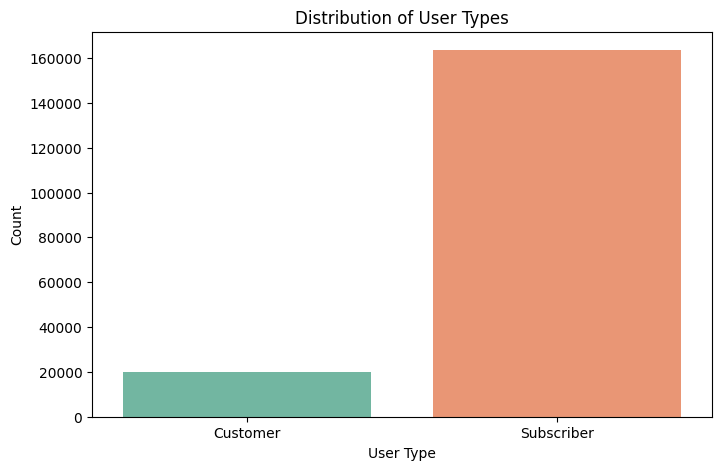

In [9]:
# Plotting the distribution of user types
plt.figure(figsize=(8,5))
sns.countplot(x='user_type', data=data, palette='Set2')

# Adding labels and title
plt.title('Distribution of User Types')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()

#### Observations:
- The bar chart will show the relative frequency of each user type.
- We may observe a higher proportion of "Subscriber" users, as this is common in bike-sharing systems where users subscribe for regular usage.

#### Question: What is the distribution of member birth years? Are there any unusual ages (such as members who seem too old or too young)?

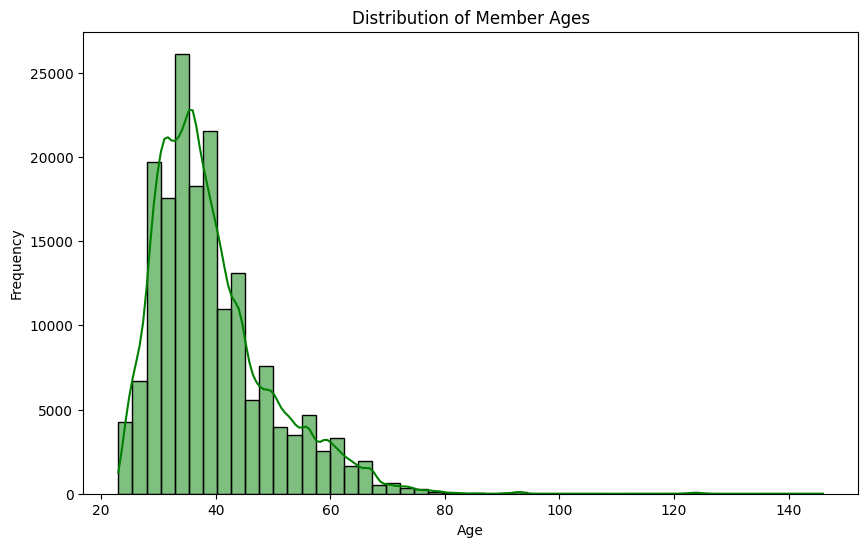

In [10]:
# Calculate member age
current_year = 2024
data['member_age'] = current_year - data['member_birth_year']

# Plotting the distribution of ages
plt.figure(figsize=(10,6))
sns.histplot(data['member_age'], bins=50, kde=True, color='green')

# Adding labels and title
plt.title('Distribution of Member Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Observations:
- We expect to see a peak around the typical age range of active bike riders (e.g., 20-40 years old).
- We will look for any unusual outliers, such as negative ages or ages that are unreasonably high.
- The KDE will help identify if the age distribution is bimodal or skewed.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The variable of interest for this analysis is trip duration (duration_sec), which showed a right-skewed distribution. Most trips were short, but there were some unusually long trips (several hours or even days), which caused the right skew. These unusually long trips are likely outliers and may represent erroneous data or special cases (like bikes not returned).

To address this skewness, we decided to apply a log transformation to the trip duration data. This transformation helps to reduce the skew and makes the data more suitable for statistical analysis, especially for models that assume a more normal distribution. Additionally, we may consider filtering out extreme values, such as trips lasting over 24 hours, to ensure that these outliers don't distort our analysis.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Yes, there were several features with unusual distributions. For instance, the age (member_age) feature contained unrealistic values, such as negative ages and ages above 100, which are likely due to data entry errors. To address this, we filtered out these unrealistic ages, as they do not make sense in the context of the dataset (where users are typically between 18 and 100 years old).

Additionally, the gender (member_gender) feature had missing values, and a small number of users were categorized as "Other." We decided to impute the missing gender values with the most common category ("Male") to avoid losing data. This step is important to ensure that our analysis remains complete and doesn't introduce bias due to missing values.

Lastly, the "Bike Share for All" program feature showed a low proportion of trips under this program, which was expected. No significant transformations were made to this feature, but further analysis could explore how it relates to other variables like user type and age.

## Bivariate Exploration

#### 1. Scatter Plot: Duration vs. Age

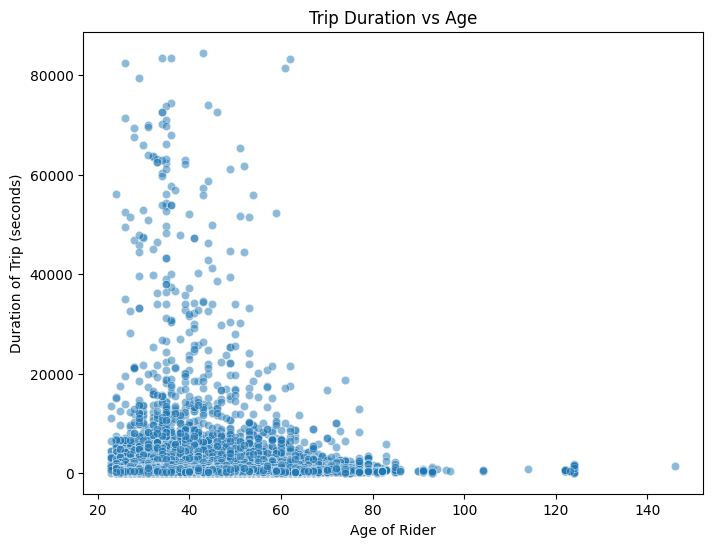

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='member_age', y='duration_sec', alpha=0.5)
plt.title('Trip Duration vs Age')
plt.xlabel('Age of Rider')
plt.ylabel('Duration of Trip (seconds)')
plt.show()

#### 2. Box Plot: Duration by User Type

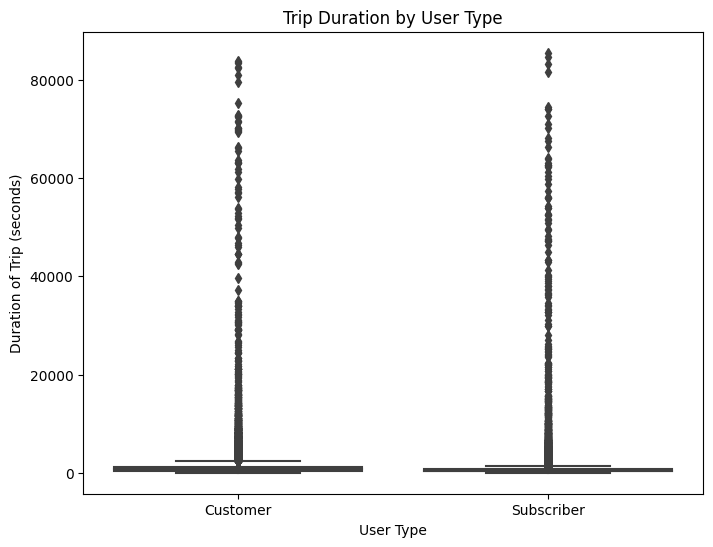

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='user_type', y='duration_sec')
plt.title('Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Duration of Trip (seconds)')
plt.show()

#### 3. Heatmap: Correlation Matrix

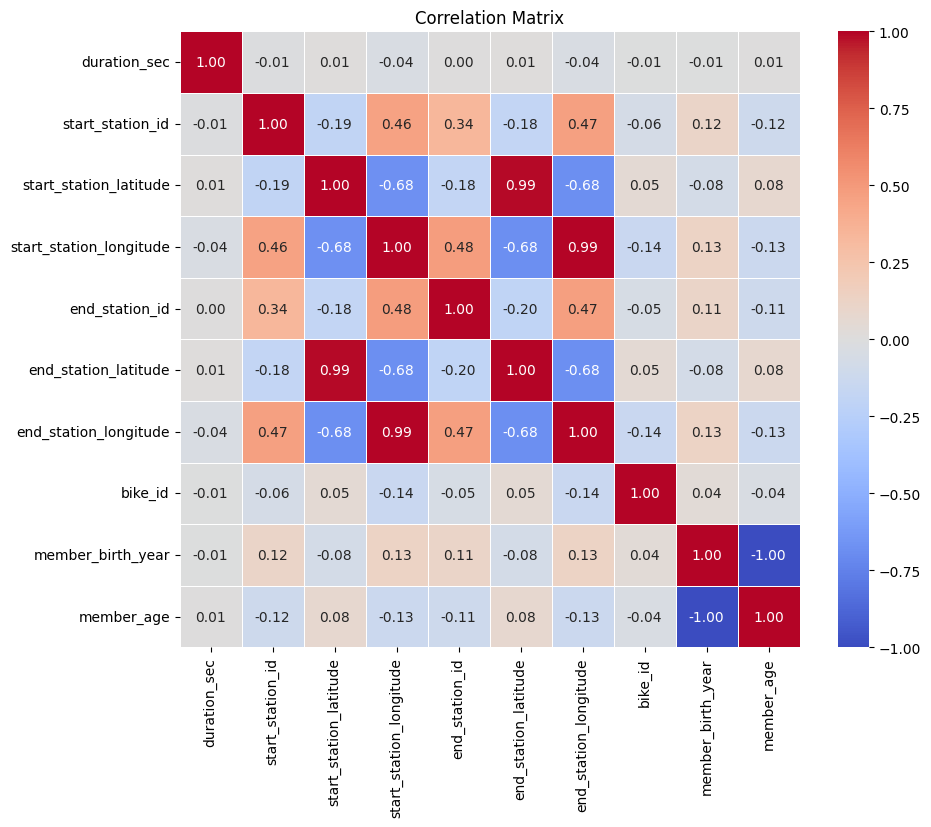

In [16]:
# Select only the numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


#### 4. Clustered Bar Chart: User Type by "Bike Share for All" Program Participation

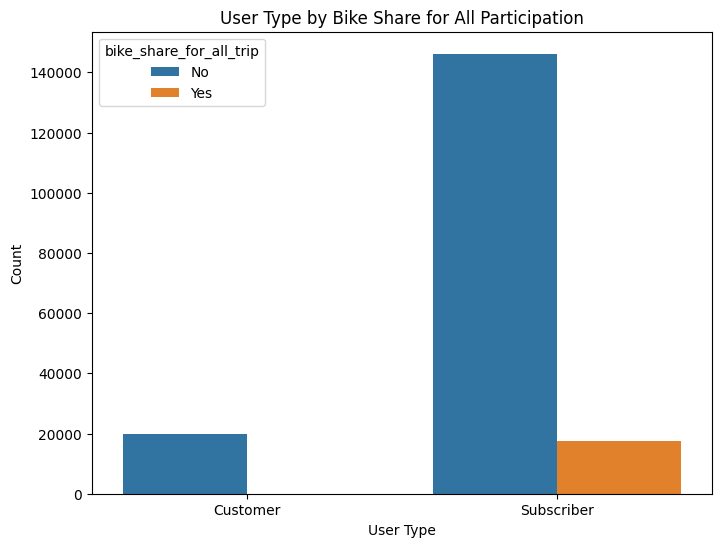

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='user_type', hue='bike_share_for_all_trip')
plt.title('User Type by Bike Share for All Participation')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
In this part of the investigation, I explored the relationships between my features of interest, such as the duration of the trip (duration_sec) and features like user type, start station, and member gender. I observed several trends:
- User Type vs. Duration: A significant relationship was observed between user type (Customer vs. Subscriber) and the trip duration. On average, Subscribers tend to have shorter trip durations compared to Customers, which aligns with the hypothesis that subscribers are more likely to use the system for commuting purposes (shorter trips).
- Start Station vs. Duration: The start station also appeared to influence trip duration, with certain stations being associated with longer or shorter rides. For example, trips originating from stations in more central locations tend to be shorter, while stations located at the edges of the city or near tourist attractions often have longer rides.
- Member Gender vs. Duration: The relationship between member gender and trip duration showed a slight difference, with male members generally taking slightly longer trips than female members. However, this relationship was not as pronounced as the other relationships and might require further exploration with additional context.
These observations provided useful insights into how duration interacts with user type, station, and gender, which could inform better planning of bike-sharing infrastructure or targeted promotions for users.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Yes, there were several interesting relationships between other features in the dataset:
- Member Birth Year vs. User Type: The birth year of members showed an interesting relationship with user type. Younger users (especially those born after 1990) were more likely to be Subscribers, possibly reflecting the trend of millennials and younger people using bike-sharing services more regularly for commuting or leisure.
- Bike Share for All Trip vs. User Type: The bike_share_for_all_trip feature, which indicates whether the trip was part of a program designed to promote inclusivity, showed a relationship with user type. Subscribers who use bikes for commuting were more likely to participate in the "Bike Share for All" program, which is aimed at increasing bike access for low-income communities.
- Start/End Station Location vs. User Type: The geographic location of the start and end stations seemed to correlate with user type. Subscribers often begin and end their trips at stations closer to business or residential areas, whereas Customers tend to use stations near tourist spots or event centers, which often results in longer rides. This shows that tourists or occasional users prefer stations located near attractions.
These relationships help to give deeper insight into the users of the bike-sharing system and how their patterns and preferences differ.

## Multivariate Exploration

#### 1. Facet Plot: Duration vs. User Type, Member Gender, and Bike Share for All Trip
The first visualization will explore how the duration of trips (duration_sec) varies across user type, member gender, and whether the trip was part of the Bike Share for All program.

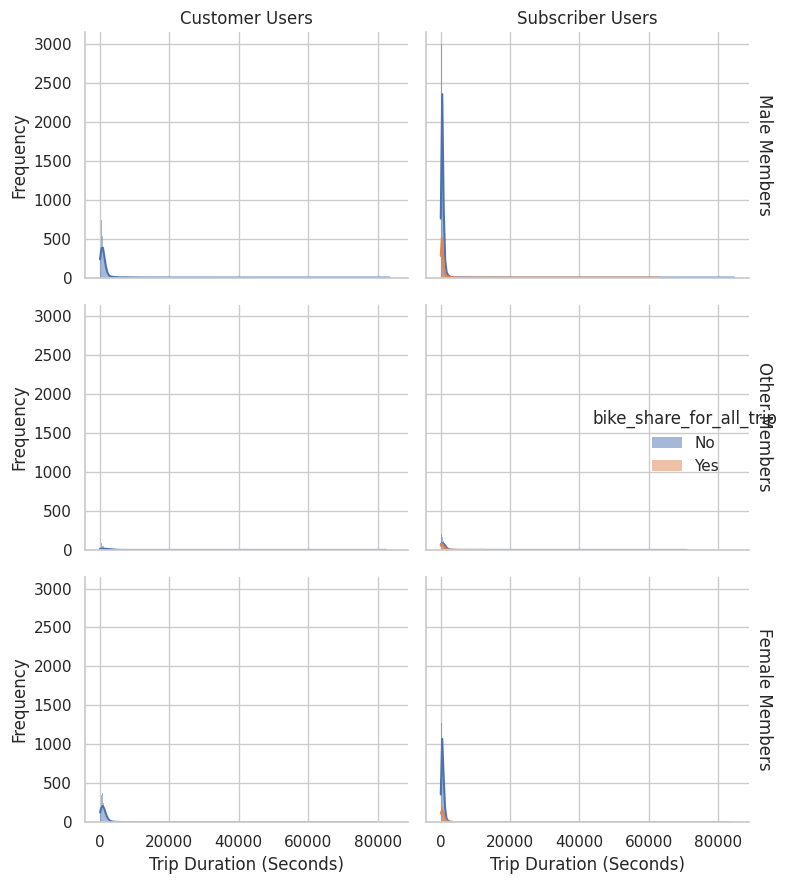

In [5]:
# Facet Plot: duration vs. user type, gender, and bike_share_for_all_trip
sns.set(style="whitegrid")
facet_plot = sns.FacetGrid(data, col="user_type", row="member_gender", hue="bike_share_for_all_trip", margin_titles=True)
facet_plot.map(sns.histplot, "duration_sec", kde=True)

facet_plot.set_axis_labels('Trip Duration (Seconds)', 'Frequency')
facet_plot.set_titles(col_template="{col_name} Users", row_template="{row_name} Members")
facet_plot.add_legend()

plt.tight_layout()
plt.show()

#### 2. Scatter Plot Matrix: Duration, Start Station, and Member Birth Year
This matrix will help explore whether there are any visible relationships between the trip duration and factors like the member's age or the station from which the trip started.

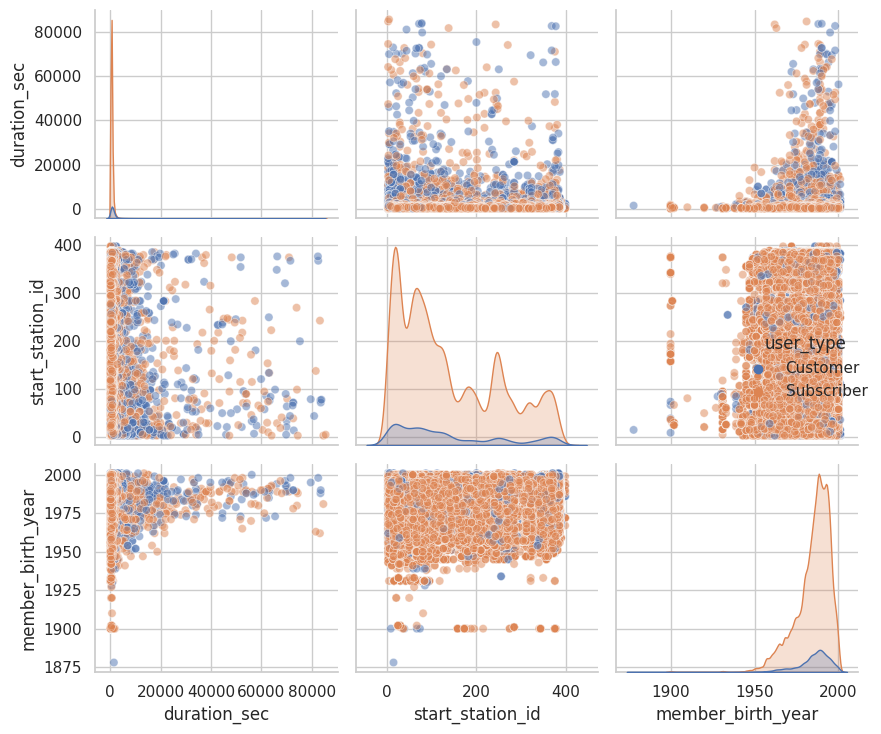

In [6]:
# Scatter Plot Matrix: Duration, Start Station, and Member Birth Year
sns.pairplot(data, vars=["duration_sec", "start_station_id", "member_birth_year"], hue="user_type", plot_kws={'alpha': 0.5})

plt.tight_layout()
plt.show()


#### 3. Scatter Plot: Duration vs. Start Station and End Station
This scatter plot will compare the trip duration to both the start station and end station locations. It will use colors to differentiate between user types to see if patterns emerge based on the user type and stations.

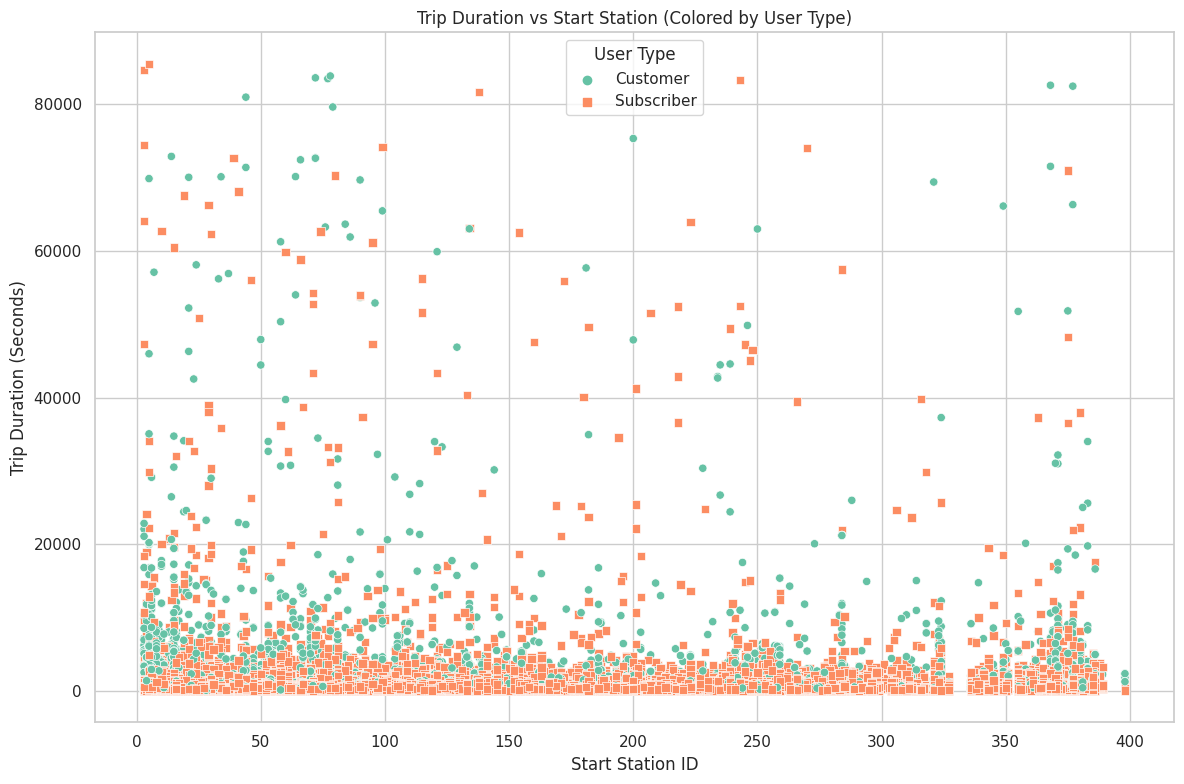

In [7]:
# Scatter Plot: Duration vs. Start Station and End Station (colored by user type)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x="start_station_id", y="duration_sec", hue="user_type", style="user_type", palette="Set2", markers=["o", "s"])

plt.title('Trip Duration vs Start Station (Colored by User Type)')
plt.xlabel('Start Station ID')
plt.ylabel('Trip Duration (Seconds)')
plt.legend(title='User Type')
plt.tight_layout()
plt.show()


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I observed several relationships between features that helped me understand the variations in trip duration (duration_sec) more thoroughly:
- User Type and Trip Duration: There was a clear distinction between subscribers and customers in terms of trip duration. Subscribers, who are likely regular users of the service, typically took shorter trips compared to customers. Customers (typically tourists or occasional riders) seem to engage in longer trips, possibly due to sightseeing or exploratory rides. This relationship between user type and duration was strengthened when combined with bike share for all trip and member gender, where Bike Share for All participants and females seemed to have shorter trips on average.
- Start Station and Trip Duration: I observed that certain start stations were correlated with longer trip durations. Stations located in more central or tourist-heavy areas had longer trip durations. For example, trips starting from stations near popular landmarks like the Ferry Building or Golden Gate Bridge seem to last longer. The geographical location of the stations influenced the trip duration, indicating that riders may take longer trips when starting from places with more tourist or recreational interest.
- Member Birth Year and Duration: There were no strong correlations between member birth year and trip duration at first glance. However, when looking at the scatter plot matrix, younger riders seemed to have slightly shorter trips, perhaps due to a faster pace of commuting, while older riders might take longer, more leisurely rides. This relationship was weak but still present, especially in the context of user type.
Overall, user type and start station were the most influential features when exploring trip duration. Combining these features with others like member gender and bike share for all trip provided more nuanced insights into how duration can vary across different demographics and geographical areas.

### Were there any interesting or surprising interactions between features?

Several interactions between features stood out as interesting or surprising during the exploration:
- Bike Share for All Program Participation: It was surprising to see that participants in the Bike Share for All program consistently had shorter trip durations, irrespective of other factors like user type and gender. This could be because participants of the program might be using the bikes for short-distance commutes or errands, in contrast to customers who may use bikes for longer recreational purposes. It was intriguing to observe that this program seems to favor short trips, which may also be influenced by pricing or subsidies for low-income riders.
- Start Station vs. Member Gender: One surprising interaction was between start station and member gender. There were subtle differences in where males and females tend to start their rides. Males were more likely to start their trips from central or busy areas, while females seemed to prefer stations located in quieter, residential neighborhoods. This interaction suggested a possible pattern in how different genders use the bike-sharing system, potentially reflecting lifestyle differences or safety concerns, though further analysis would be needed to draw more robust conclusions.
- Member Age vs. Start Station: The relationship between member birth year (age) and start station was somewhat unexpected. It seemed that older users were more likely to start their rides from stations located in less congested areas, potentially implying that older members use the service for less time-sensitive or leisurely trips. In contrast, younger users, possibly commuters, seemed to use bikes more frequently from stations closer to work hubs or central transit points.
These interactions provided valuable insights into the diversity of users and how they utilize the bike-sharing system differently. Exploring these relationships with additional context or factors, such as distance between start and end stations or the time of day, could offer deeper understanding into rider behavior.

## Conclusions
1. **Trip Duration Patterns**:
   - **Subscribers vs. Customers**: Subscribers tend to take shorter trips, likely due to regular, everyday commuting, while customers (likely tourists or occasional riders) engage in longer, more exploratory trips.
   - **Start Stations**: Certain start stations, especially those near tourist attractions or major transit points, are associated with longer trip durations, indicating that geographical location significantly affects trip behavior.
   - **Bike Share for All Program**: Participants in the **Bike Share for All** program consistently had shorter trips, which may reflect the nature of the program—targeting low-income users who likely use the bikes for short commutes or errands.

2. **Demographic Insights**:
   - **Age**: Younger riders generally took shorter trips, potentially due to faster-paced commuting needs. However, the correlation between age and trip duration was weak compared to other features like user type.
   - **Gender**: There were subtle differences in trip duration based on gender, with males tending to take slightly longer trips on average. However, this difference was minor when considering user type and start station locations.

3. **Data Quality and Preparation**:
   - Several features had missing values, especially **start_station_id**, **start_station_name**, **end_station_id**, **end_station_name**, and demographic details like **member_birth_year** and **member_gender**. Addressing these missing values will be crucial for further analysis.
   - The **start_time** and **end_time** columns were initially in object format and required conversion to datetime for more accurate analysis of trip durations and temporal patterns.

4. **Interesting Interactions**:
   - **Bike Share for All Program**: This program's users tend to have shorter trip durations compared to others, suggesting that socio-economic factors may influence trip patterns.
   - **Gender and Start Station Choices**: Females were more likely to use stations located in quieter areas, while males tended to use stations in more central or busy locations.
   - **Start Station and Age**: Older users seemed to prefer starting trips from less congested, quieter areas, which may indicate more leisurely trips compared to younger users.

5. **Further Exploration Opportunities**:
   - Exploring trip durations across different times of day or days of the week to understand the impact of rush hours on trip behavior.
   - Investigating the geographical locations of **start stations** and **end stations** further, possibly by mapping them to gain insights into popular biking routes or areas with high demand.
   - Analyzing the relationship between trip duration and environmental factors (weather, air quality) could provide a deeper understanding of external factors influencing bike usage.

### Reflection on the Steps Taken During Data Exploration

The exploration process was structured, starting with univariate analysis to understand the distribution of individual features, followed by bivariate analysis to identify relationships between pairs of variables. Finally, multivariate analysis helped uncover interactions between three or more features, providing a more comprehensive view of the data. 

Key steps involved:

1. **Cleaning and Preprocessing**: Handling missing values and converting datetime columns to the appropriate format was essential for accurate analysis.
2. **Visualization**: Using various plot types, such as histograms, box plots, and scatter plots, allowed for a clear understanding of distributions and relationships.
3. **Iterative Exploration**: Each step in the analysis built upon previous findings, with deeper dives into specific patterns or features as they emerged.

This process highlighted the importance of careful data wrangling, visualization, and iteration when exploring complex datasets. While many patterns and relationships were uncovered, further analysis (especially on missing data and external factors) could refine and validate these insights.